In [2]:
!pip install gdown
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Loading the dataset

In [3]:
import pandas as pd
import gdown


drive_url = "https://drive.google.com/uc?id=1qswUE7aOrTMSxPfOwqOH5gw1WE30SiDl"

# Defining the output file path
output_file = "/content/drive/My Drive/drug_classification.csv"

# Downloading the dataset from the Google Drive URL
gdown.download(drive_url, output_file, quiet=False)

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(output_file)


print("First 5 rows of the dataset:")
print(df.head())



Downloading...
From: https://drive.google.com/uc?id=1qswUE7aOrTMSxPfOwqOH5gw1WE30SiDl
To: /content/drive/My Drive/drug_classification.csv
100%|██████████| 6.03k/6.03k [00:00<00:00, 10.5MB/s]

First 5 rows of the dataset:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


Split the data into training and test sets (70% train, 30% test)

In [4]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['Sex','BP', 'Cholesterol'], drop_first=True)

X = df.drop("Drug", axis=1)  # Features
y = df["Drug"]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Support vector classifier


In [12]:
from sklearn.svm import SVC

# Creating an SVC model with a linear kernel
cls = SVC(kernel="linear").fit(X_train, y_train)

# print(cls)


Train and Test accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))





Train Accuracy: 100.00%
Test Accuracy: 98.33%


 Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

accuracy_results = {}

for kernel in kernels:
    cls = SVC(kernel=kernel, C=1).fit(X_train, y_train)

    y_pred = cls.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_results[kernel] = accuracy

for kernel, accuracy in accuracy_results.items():
    print(f'Accuracy for {kernel} kernel: {accuracy:.2f}%')

best_kernel = max(accuracy_results, key=accuracy_results.get)
print(f'Best performing kernel: {best_kernel}')


Accuracy for linear kernel: 98.33%
Accuracy for poly kernel: 63.33%
Accuracy for rbf kernel: 73.33%
Accuracy for sigmoid kernel: 43.33%
Best performing kernel: linear


Draw the ROC for linear kernel

DrugY
AUC = 1.00
drugA
AUC = 1.00
drugB
AUC = 0.99
drugC
AUC = 1.00
drugX
AUC = 1.00


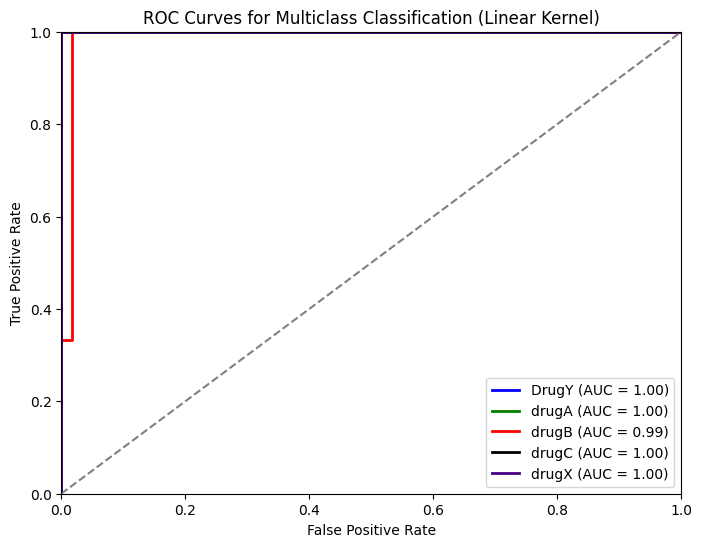

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Createing an SVC model with a linear kernel
linear_svc = SVC(kernel='linear', probability=True)
linear_svc.fit(X_train, y_train)

#Predicted probabilities for all classes
linear_probs = linear_svc.decision_function(X_test)

class_names = linear_svc.classes_

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'black', 'indigo']

for i, (class_name, color) in enumerate(zip(class_names, colors)):
    print(class_name)
    fpr, tpr, _ = roc_curve(y_test == class_name, linear_probs[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'AUC = {roc_auc:.2f}')
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification (Linear Kernel)')
plt.legend(loc='lower right')
plt.show()


Draw the ROC for Ploynomial kernel

DrugY
AUC = 0.97
drugA
AUC = 1.00
drugB
AUC = 0.92
drugC
AUC = 0.97
drugX
AUC = 0.90


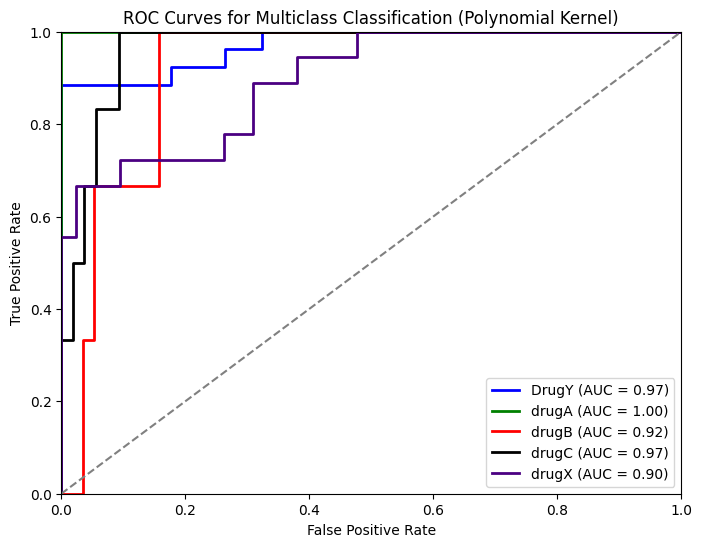

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

poly_svc = SVC(kernel='poly', probability=True)
poly_svc.fit(X_train, y_train)

poly_probs = poly_svc.predict_proba(X_test)

class_names = poly_svc.classes_

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'black', 'indigo']

for i, (class_name, color) in enumerate(zip(class_names, colors)):
    print(class_name)
    fpr, tpr, _ = roc_curve(y_test == class_name, poly_probs[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'AUC = {roc_auc:.2f}')


    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification (Polynomial Kernel)')
plt.legend(loc='lower right')
plt.show()


ROC Curves for Multiclass Classification

DrugY
AUC for Linear Kernel = 1.00
AUC for Polynomial Kernel = 0.97
drugA
AUC for Linear Kernel = 1.00
AUC for Polynomial Kernel = 1.00
drugB
AUC for Linear Kernel = 0.99
AUC for Polynomial Kernel = 0.92
drugC
AUC for Linear Kernel = 1.00
AUC for Polynomial Kernel = 0.97
drugX
AUC for Linear Kernel = 1.00
AUC for Polynomial Kernel = 0.90


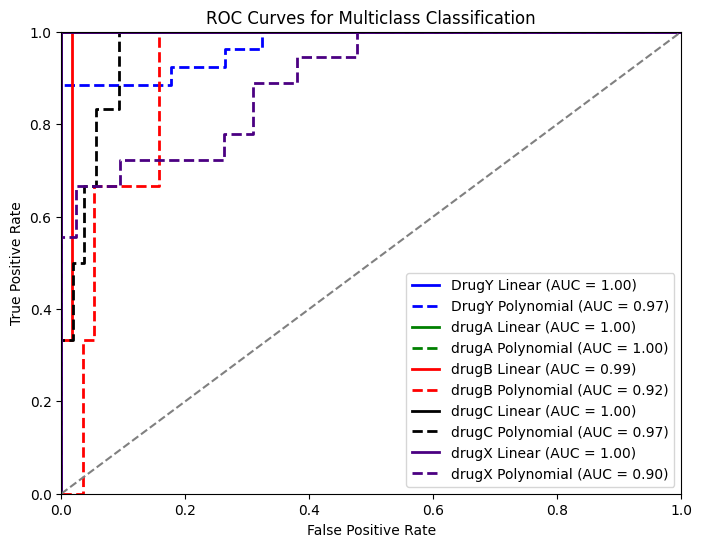

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'black', 'indigo']

for i, (class_name, color) in enumerate(zip(class_names, colors)):
    print(class_name)
    fpr_linear, tpr_linear, _ = roc_curve(y_test == class_name, linear_probs[:, i])
    roc_auc_linear = auc(fpr_linear, tpr_linear)
    print(f'AUC for Linear Kernel = {roc_auc_linear:.2f}')

    fpr_poly, tpr_poly, _ = roc_curve(y_test == class_name, poly_probs[:, i])
    roc_auc_poly = auc(fpr_poly, tpr_poly)
    print(f'AUC for Polynomial Kernel = {roc_auc_poly:.2f}')


    plt.plot(fpr_linear, tpr_linear, lw=2, label=f'{class_name} Linear (AUC = {roc_auc_linear:.2f})', color=color, linestyle='-')
    plt.plot(fpr_poly, tpr_poly, lw=2, label=f'{class_name} Polynomial (AUC = {roc_auc_poly:.2f})', color=color, linestyle='--')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


Plot the confusion matrix for which you got the highest accuracy

Accuracy for Linear Kernel is the highest: 98.33%


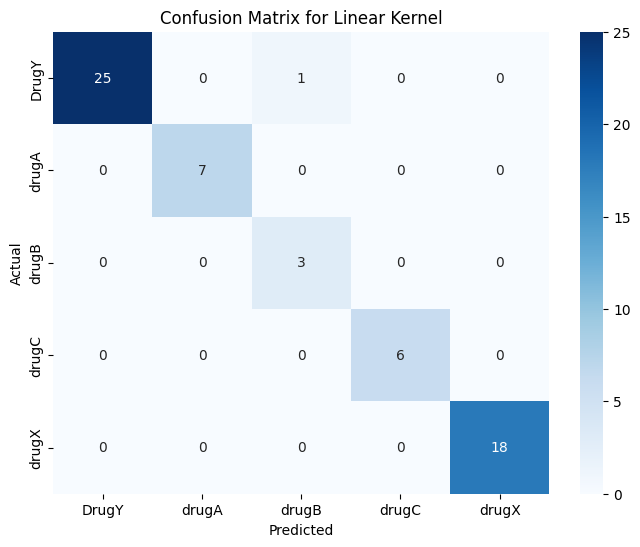

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(f'Accuracy for Linear Kernel is the highest: {98.33}%')

y_pred = linear_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

class_names = linear_svc.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()


Identify hyper parameter of SVC and show the effect of hyper parameter on your dataset.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

results = {}

hyperparameters = {
    'C': [0.1, 1.0, 1.5],
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'gamma': [0.01, 0.1, 1.0]
}

for C in hyperparameters['C']:
    for kernel in hyperparameters['kernel']:
        for gamma in hyperparameters['gamma']:

            model = SVC(C=C, kernel=kernel, gamma=gamma)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)*100

            results[(C, kernel, gamma)] = accuracy

            print(f"Hyperparameters: C={C}, Kernel={kernel}, Gamma={gamma}, Accuracy: {accuracy:.2f}%")
    print()

best_hyperparam = max(results, key=results.get)
best_accuracy = results[best_hyperparam]

print(f"Best Hyperparameters: C={best_hyperparam[0]}, Kernel={best_hyperparam[1]}, Gamma={best_hyperparam[2]}")
print(f"Best Accuracy: {best_accuracy:.2f}%")


Hyperparameters: C=0.1, Kernel=linear, Gamma=0.01, Accuracy: 71.67%
Hyperparameters: C=0.1, Kernel=linear, Gamma=0.1, Accuracy: 71.67%
Hyperparameters: C=0.1, Kernel=linear, Gamma=1.0, Accuracy: 71.67%
Hyperparameters: C=0.1, Kernel=poly, Gamma=0.01, Accuracy: 90.00%
Hyperparameters: C=0.1, Kernel=poly, Gamma=0.1, Accuracy: 95.00%
Hyperparameters: C=0.1, Kernel=poly, Gamma=1.0, Accuracy: 95.00%
Hyperparameters: C=0.1, Kernel=rbf, Gamma=0.01, Accuracy: 43.33%
Hyperparameters: C=0.1, Kernel=rbf, Gamma=0.1, Accuracy: 43.33%
Hyperparameters: C=0.1, Kernel=rbf, Gamma=1.0, Accuracy: 43.33%
Hyperparameters: C=0.1, Kernel=sigmoid, Gamma=0.01, Accuracy: 43.33%
Hyperparameters: C=0.1, Kernel=sigmoid, Gamma=0.1, Accuracy: 43.33%
Hyperparameters: C=0.1, Kernel=sigmoid, Gamma=1.0, Accuracy: 43.33%

Hyperparameters: C=1.0, Kernel=linear, Gamma=0.01, Accuracy: 98.33%
Hyperparameters: C=1.0, Kernel=linear, Gamma=0.1, Accuracy: 98.33%
Hyperparameters: C=1.0, Kernel=linear, Gamma=1.0, Accuracy: 98.33%
H